In [92]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [93]:
# Carregar arquivo para um DataFrame
df_exames = pd.read_csv('./datasets/exame_diabetes.csv')

In [94]:
# Visualizando estrutura
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [95]:
# Apresentando as 10 primeiras linhas
df_exames.head(10)

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100
5,6,M,64,93,190,117
6,7,F,21,70,182,90
7,8,F,60,101,179,84
8,9,F,63,83,189,92
9,10,F,65,78,175,121


In [96]:
# Remover coluna id_paciente pois ela é uma variavel apenas de identificação
df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)
df_exames.head(10)


,genero,idade,peso,altura,resultado
0,M,46,83,165,98
1,F,23,83,164,82
2,M,39,71,154,93
3,F,26,103,165,95
4,M,27,55,176,100
5,M,64,93,190,117
6,F,21,70,182,90
7,F,60,101,179,84
8,F,63,83,189,92
9,F,65,78,175,121


In [97]:
# Convertendo uma váriavel caegorica em númerica usando One-Ho Encoding

df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')

In [98]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
5,64,93,190,117,0,1
6,21,70,182,90,1,0
7,60,101,179,84,1,0
8,63,83,189,92,1,0
9,65,78,175,121,1,0


A partir de agora, todas as variáveis estão com valores int64 e sem valores nulos

<Axes: >

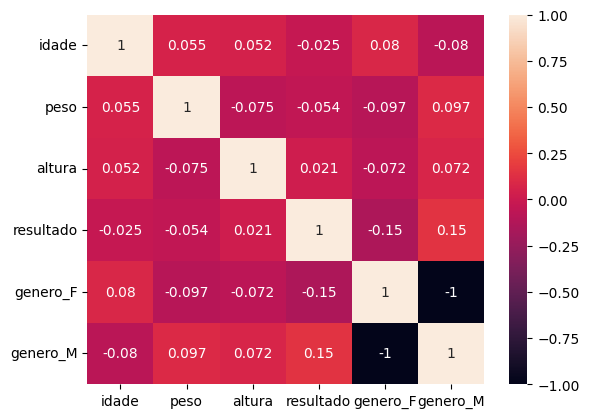

In [99]:
# Apresentar um Mapa de Calor com Correlação entre as variáveis
sns.heatmap(df_exames.corr(), vmin = -1, vmax=1, annot=True)

<Axes: >

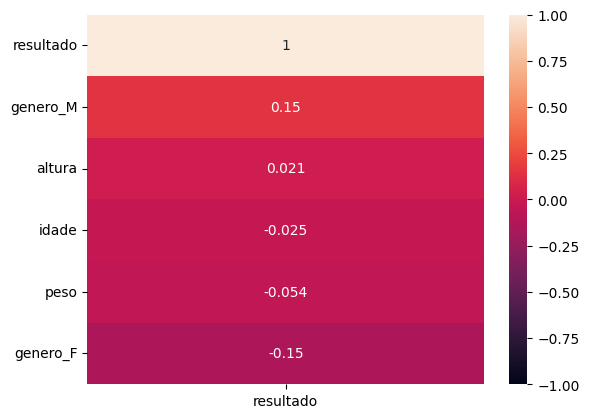

In [100]:
# Mapa de Correlação só com a variável target (resultado)
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), vmin=-1, vmax=1, annot=True)

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>],
       [<Axes: xlabel='idade', ylabel='resultado'>,
        <Axes: xlabel='peso', ylabel='resultado'>,


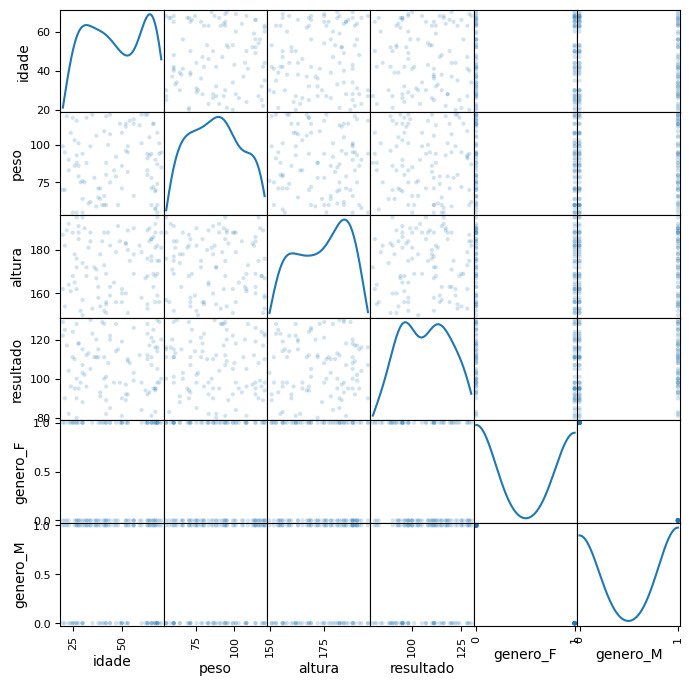

In [101]:
# Gráfico de dispersão com distribuição
pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(8, 8), diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>, <Axes: >, <Axes: >]],
      dtype=object)

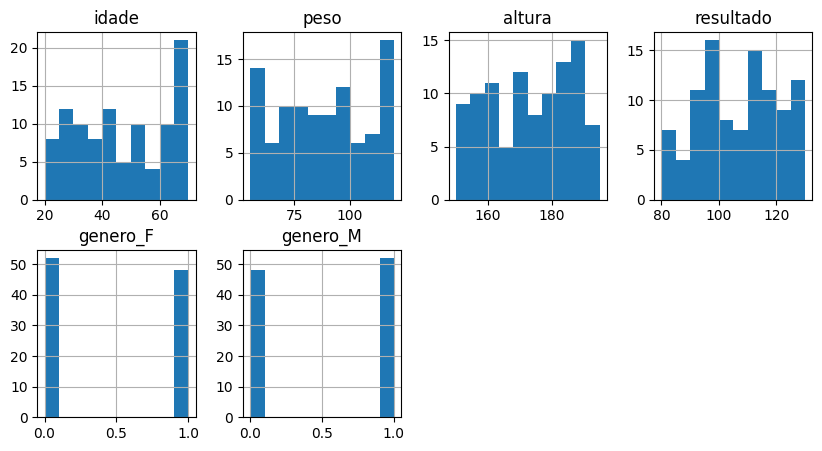

In [102]:
# Histograma de todas as variáveis
df_exames.hist(layout=(2, 4), figsize=(10, 5))

In [103]:
# Criar uma nova feature (IMC = peso/altura²) 
df_exames['imc'] = (df_exames['peso'] / ((df_exames['altura']/100)**2))
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682
5,64,93,190,117,0,1,25.761773
6,21,70,182,90,1,0,21.132713
7,60,101,179,84,1,0,31.522112
8,63,83,189,92,1,0,23.235632
9,65,78,175,121,1,0,25.469388


In [104]:
# Importando o que vamos usar do scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [105]:
# Modelo 1 - sem IMC

# X representa apenas as variaveis independentes, sem o IMC para o modelo 1
X = df_exames.drop(columns=['imc', 'resultado'])
Y = df_exames['resultado']


In [106]:
# Dividir o conjunto para o treino e o teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=51)

In [107]:
# Treinar o algoritmo de Regressão Linear com o modelo 1
model_1 = LinearRegression().fit(X_train, Y_train)

In [108]:
# Gerar predições do conjunto de testes com base no modelo 1
Y_pred = model_1.predict(X_test,)

In [109]:
model_1.coef_, model_1.intercept_

(array([-0.00694816, -0.0788198 ,  0.10991808, -2.96913112,  2.96913112]),
 np.float64(94.21133142019875))

In [110]:
# R2 Score varia entre menos infinito e 1, quanto mais próximo de 1 maior a relação entre as variaveis independentes e o target
# R2 Score do treino
model_1.score(X_train, Y_train)

0.06218388634297267

In [111]:
# R2 Score dos testes
model_1.score(X_test, Y_test)
# Piorou!!!

-0.1364090447910642

In [112]:
# MAE (Mean Absolute Error)
mean_absolute_error(Y_test, Y_pred)
# Incerteza muito alta!!

np.float64(12.695569181179541)